In [1]:
%%time
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

CPU times: user 50 s, sys: 4.01 s, total: 54 s
Wall time: 1min 14s


In [2]:
type(mnist)

sklearn.utils.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [5]:
mnist.target[0]

'5'

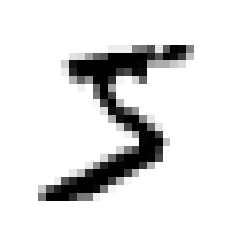

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

X, y = mnist['data'], mnist['target']
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [7]:
mnist.target.astype('int')

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

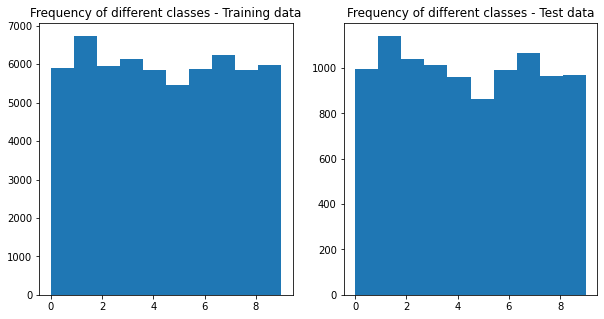

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Test data');

In [11]:
# Logistic Regression(Lasso regression 적용)

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )
logistic_regression

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [13]:
%%time
logistic_regression.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 48 epochs took 342 seconds
CPU times: user 5min 40s, sys: 403 ms, total: 5min 40s
Wall time: 5min 42s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  5.7min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [14]:
logistic_regression.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
logistic_regression.coef_.shape

(10, 784)

In [16]:
logistic_regression.intercept_

array([-1.16969625e-04,  1.40843141e-04,  1.17313048e-04, -2.40456377e-04,
        6.95119404e-05,  8.58108190e-04, -3.90065670e-05,  2.74469427e-04,
       -8.75510802e-04, -1.88302375e-04])

In [17]:
print(logistic_regression.predict(X_test[0:9]))
print(y_test[0:9])

[0 4 1 2 4 7 7 1 1]
10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int64


In [18]:
logistic_regression.score(X_train, y_train)

0.9374666666666667

In [19]:
score = logistic_regression.score(X_test, y_test) # test score
score

0.9194

In [20]:
from sklearn import metrics

predictions = logistic_regression.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = logistic_regression.classes_)
cm

array([[ 967,    0,    1,    2,    1,    9,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   13,  931,   18,   12,    1,   15,   10,   34,    3],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   30,    9,  747,   16,    6,   30,    7],
       [   7,    3,    6,    0,   11,   18,  938,    1,    5,    0],
       [   2,    5,   13,    2,   12,    2,    1,  982,    4,   41],
       [   4,   17,    8,   18,    6,   25,    9,    2,  862,   12],
       [   4,    5,    6,   10,   34,    7,    2,   31,    8,  862]])

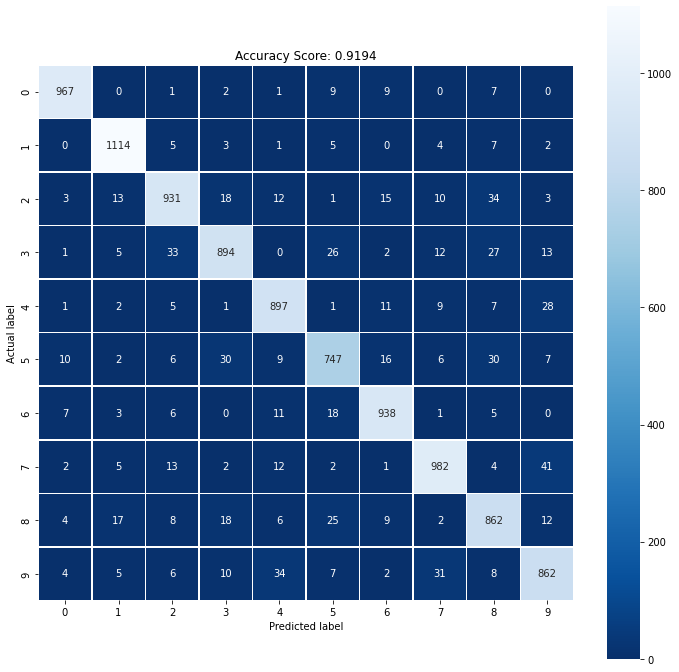

In [21]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

In [22]:
# data preprocessing(Using PCA for dimension reduction)

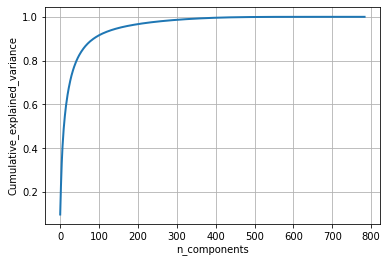

In [23]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.n_components = 784
X_reduced = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [24]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [25]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 154


In [26]:
logistic_reg_pca = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                        )
logistic_reg_pca

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [27]:
%%time
logistic_reg_pca.fit(X_reduced, y_train)
# batch 사이즈
# dicision tree
# random forest => ensemble
# svm 준나게 느림


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 17 epochs took 18 seconds
CPU times: user 17.6 s, sys: 34.8 ms, total: 17.7 s
Wall time: 17.6 s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:   17.6s finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

In [28]:
pca.n_components = 154
X_test_reduced = pca.fit_transform(X_test)
print(logistic_reg_pca.predict(X_test_reduced[0:9]))
print(y_test[0:9])

[0 4 1 3 7 7 7 1 1]
10840    0
56267    4
14849    1
62726    2
47180    7
61640    9
52730    7
21847    1
20394    1
Name: class, dtype: int64


In [29]:
logistic_reg_pca.score(X_reduced, y_train)

0.9222166666666667

In [30]:
score_reduced = logistic_reg_pca.score(X_test_reduced, y_test) # test score
score_reduced

0.3962

In [31]:
# Shift image

In [32]:
from scipy.ndimage import shift
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Method to shift the image by given dimension
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


# Creating Augmented Dataset
X_train_augmented = [image for image in X_train.values]
y_train_augmented = [image for image in y_train]

for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(X_train.values, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [33]:
%%time
# Shuffle the dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = np.array(X_train_augmented)[shuffle_idx]
y_train_augmented = np.array(y_train_augmented)[shuffle_idx]


# Training on augmented dataset
rf_clf_for_augmented = RandomForestClassifier(random_state=42)
rf_clf_for_augmented.fit(X_train_augmented, y_train_augmented)

# Evaluating the model
y_pred_after_augmented = rf_clf_for_augmented.predict(X_test)
score = accuracy_score(y_test, y_pred_after_augmented)
print("Accuracy score after training on augmented dataset", score)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy score after training on augmented dataset 0.9788
CPU times: user 15min 40s, sys: 4.77 s, total: 15min 45s
Wall time: 15min 57s


In [ ]:
# CNN

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(X_train_cnn, y_train_cnn), (X_test_cnn, y_test_cnn) = keras.datasets.mnist.load_data()

# convert class vectors to binary class matrices

# Scale images to the [0, 1] range
X_train_cnn = X_train_cnn.astype("float32") / 255
X_test_cnn = X_test_cnn.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train_cnn = np.expand_dims(X_train_cnn, -1)
X_test_cnn = np.expand_dims(X_test_cnn, -1)
print("X_train shape:", X_train_cnn.shape)

# convert class vectors to binary class matrices
y_train_cnn = keras.utils.to_categorical(y_train_cnn, num_classes)
y_test_cnn = keras.utils.to_categorical(y_test_cnn, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)


In [53]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [54]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
model.fit(X_train_cnn, y_train_cnn, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 47s 109ms/step - loss: 0.3748 - accuracy: 0.8863 - val_loss: 0.0846 - val_accuracy: 0.9765
Epoch 2/15
422/422 [==============================] - 47s 112ms/step - loss: 0.1116 - accuracy: 0.9660 - val_loss: 0.0576 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0838 - accuracy: 0.9745 - val_loss: 0.0515 - val_accuracy: 0.9855
Epoch 4/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0704 - accuracy: 0.9781 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0636 - accuracy: 0.9802 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 45s 107ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 46s 110ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.0334 - val_ac

In [57]:
score_cnn = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print("Test loss:", score_cnn[0])
print("Test accuracy:", score_cnn[1])

Test loss: 0.02414536662399769
Test accuracy: 0.9919999837875366
